### Python implementation

In [1]:
# Business Case:-To predict whether a person will have diabetes or not.

In [2]:
# import all required libraries

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor # For regression task
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Reading the data
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
# Domain analysis
# EDA and get the insights from data.


In [5]:
# Get the statistical information of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
# Data Preprocessing

In [7]:
# Cheking for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It seems that there are no missing values in our data. Great, let's see the distribution of data:

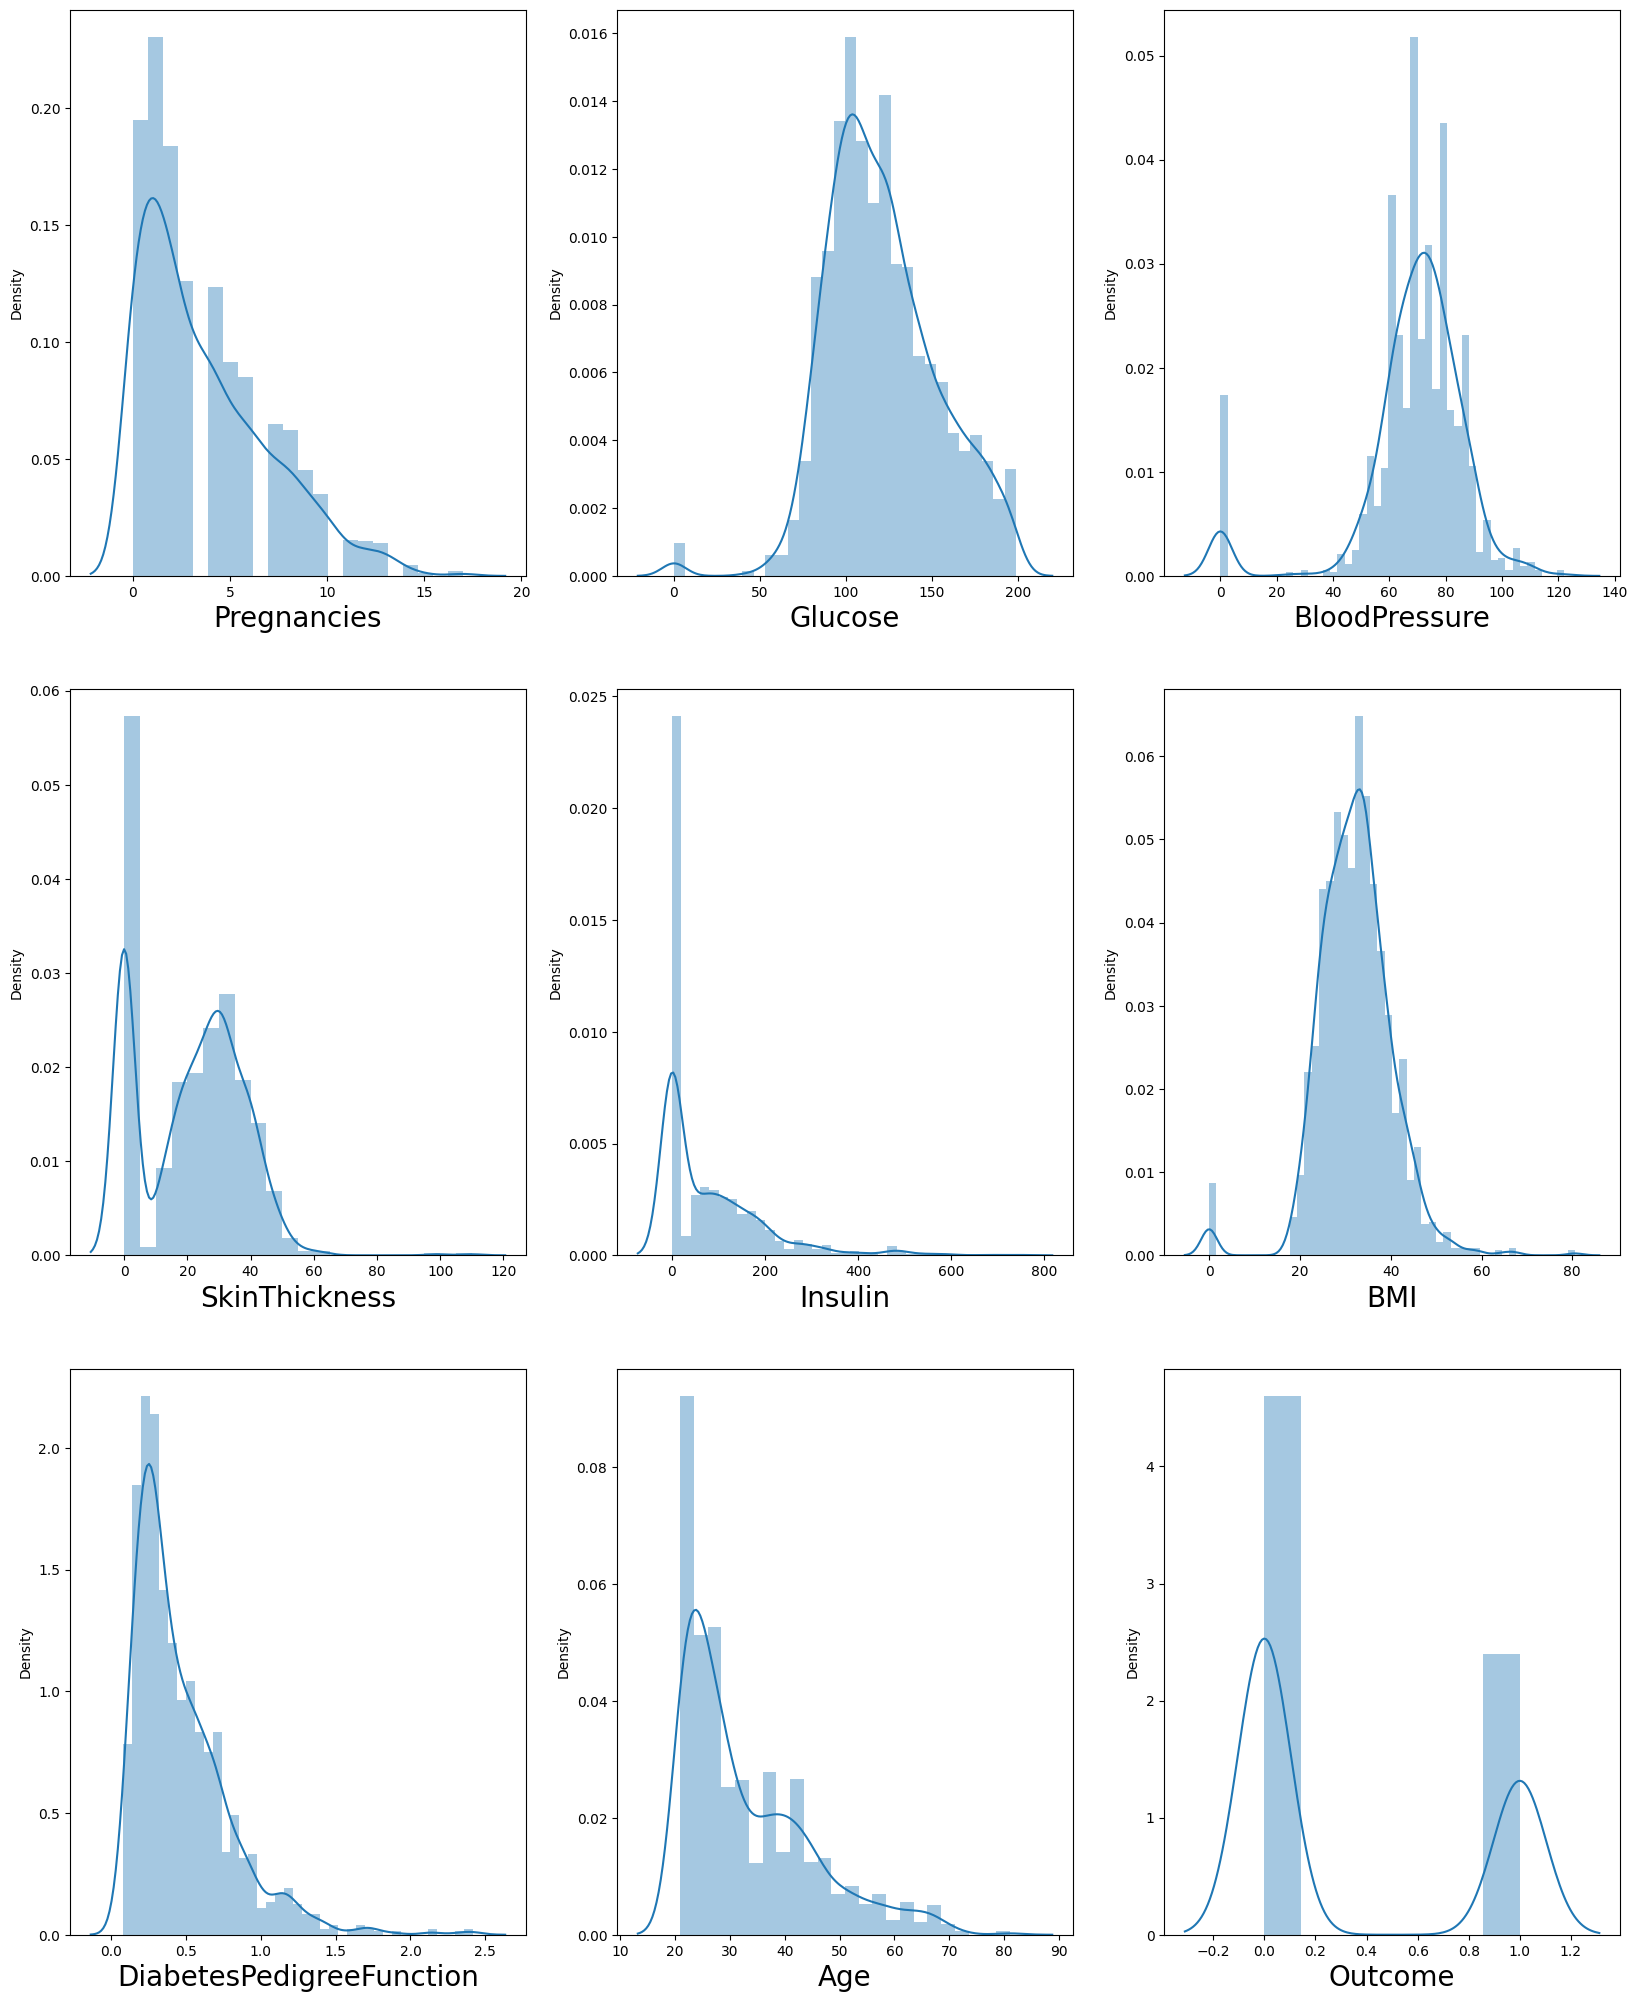

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Insulin, skin thickness, BMI and Blood Pressure which have value as 0. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.


In [9]:
c=0
for i in np.where(data['BloodPressure']==0):
    print(i)
# len(np.where(data['BMI']==0))

[   2   12   49   60   78   81  172  193  222  261  266  269  300  332
  336  347  357  426  430  435  453  468  484  494  522  533  535  589
  601  604  619  643  697  703  706  770  802  806  817  827  896  900
  905  923  938  954  964  990  992 1046 1058 1061 1076 1100 1154 1160
 1163 1227 1330 1351 1380 1419 1424 1427 1485 1489 1494 1512 1527 1543
 1553 1568 1576 1591 1600 1610 1679 1683 1689 1692 1707 1731 1785 1791
 1794 1870 1881 1899 1902 1993]


In [10]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].median())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].median())

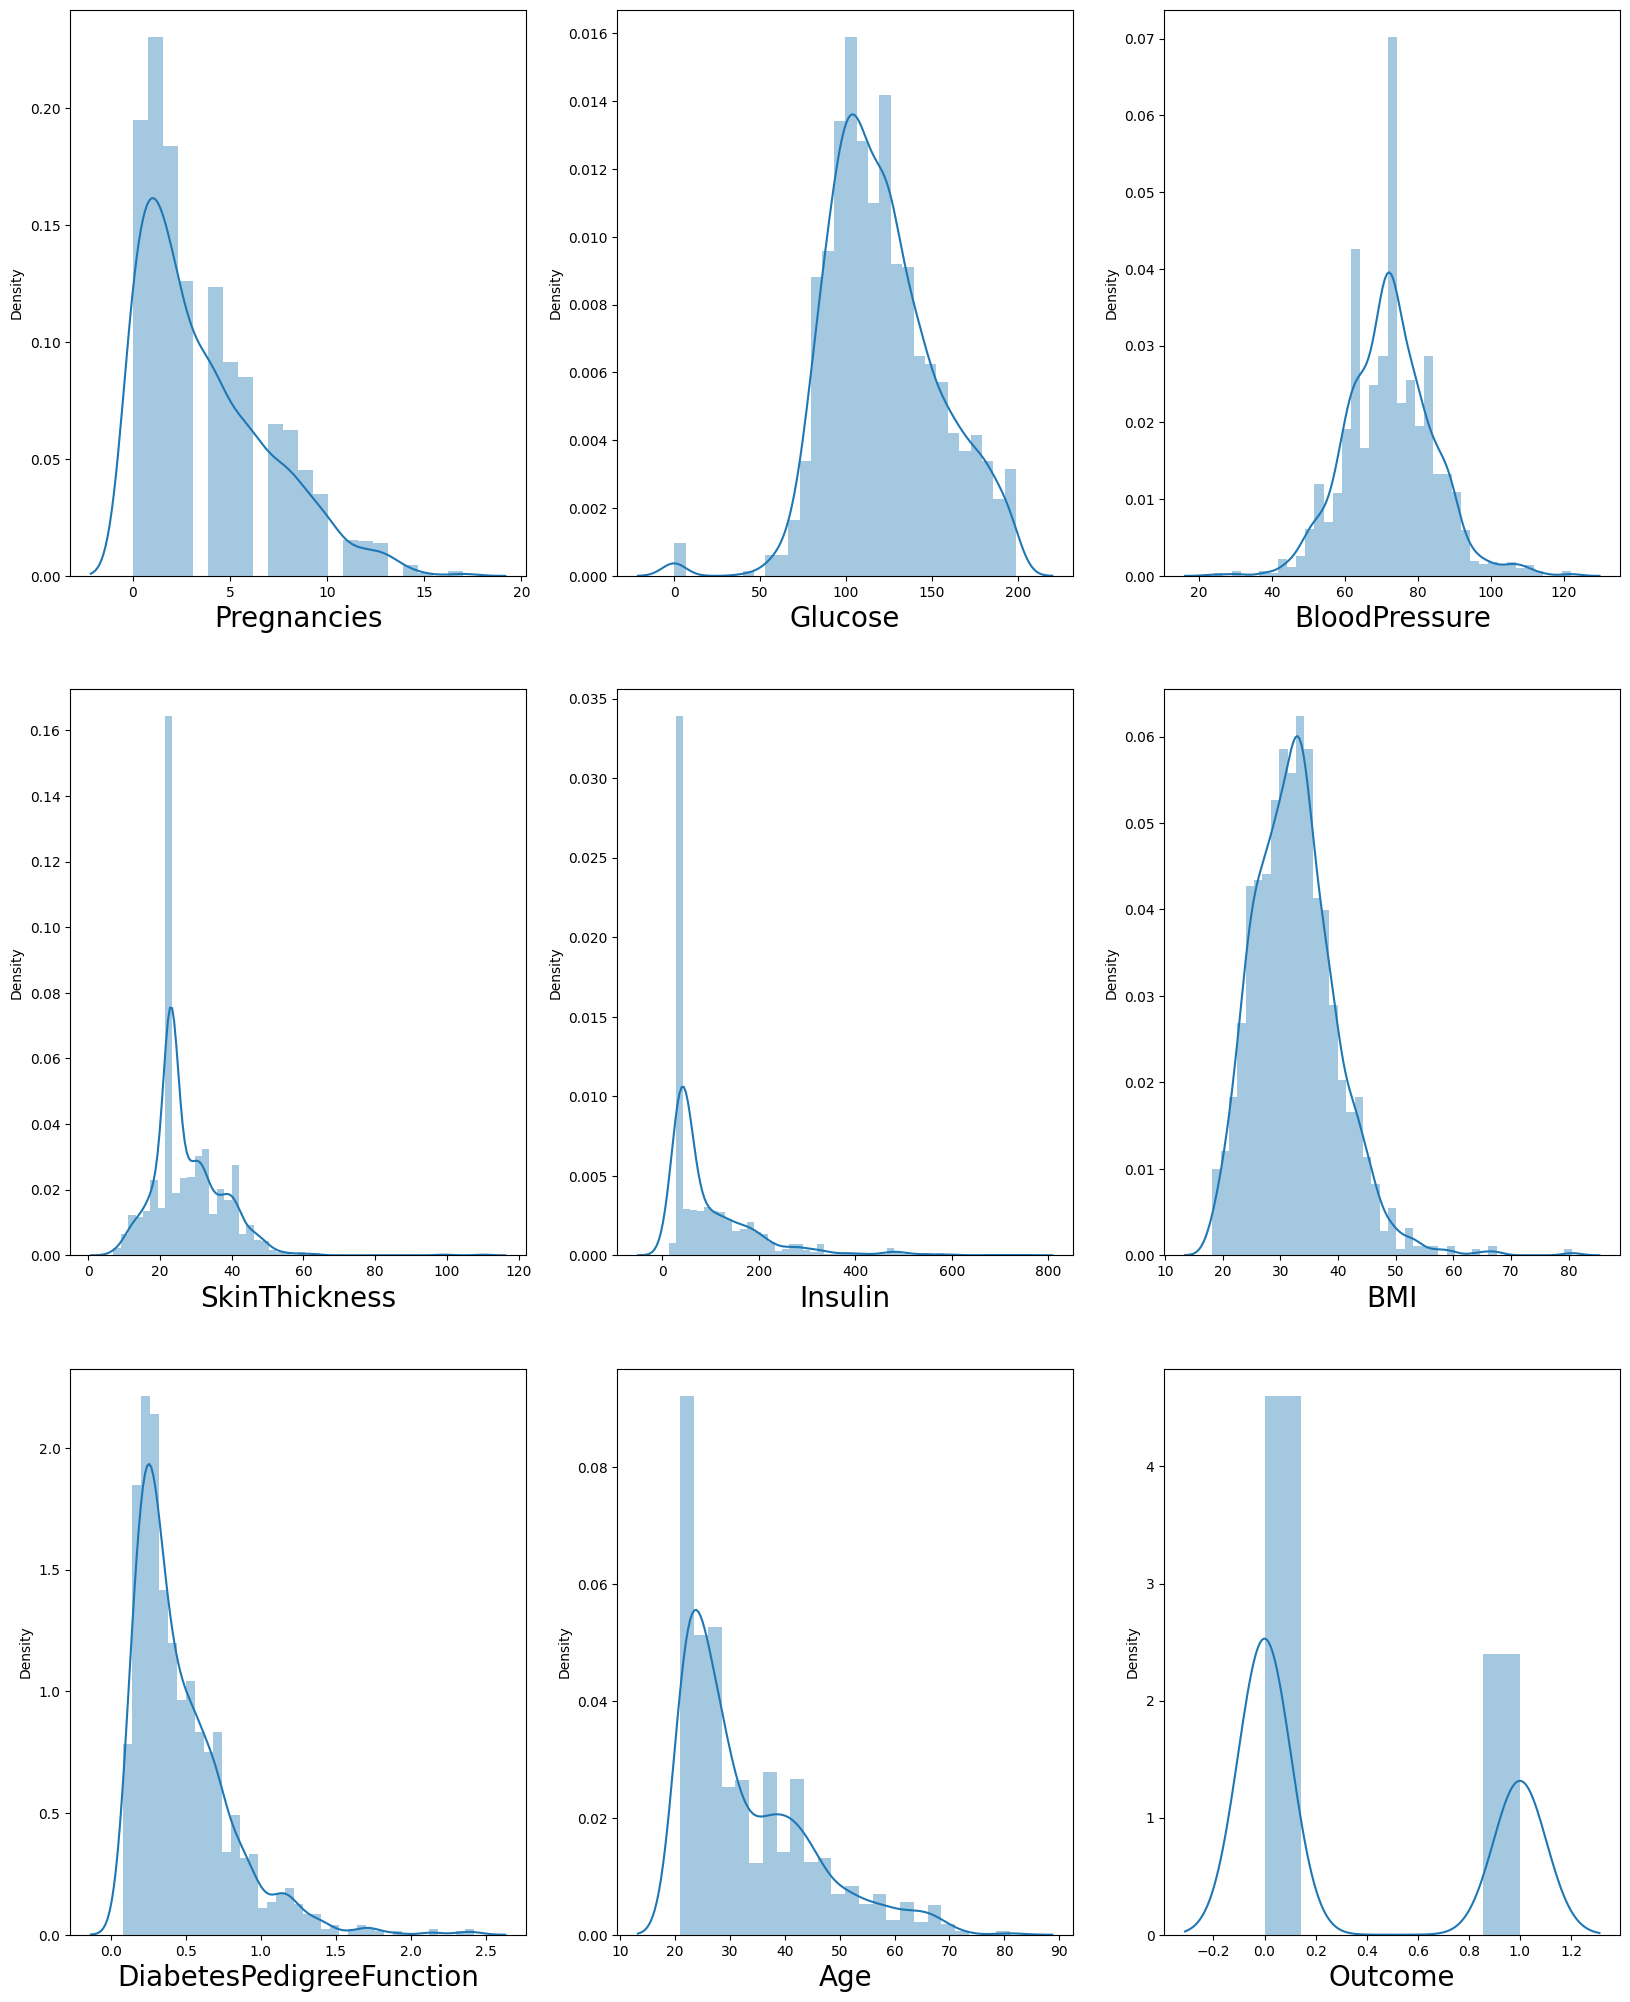

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

## Model Creation

In [12]:
### Split X and Y
X = data.drop(columns = ['Outcome']) # Independent variables
y = data['Outcome'] # Dependent or target varaible.

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,40,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,72,23,40,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,23,40,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [14]:
## scaling the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [15]:
# y

In [16]:
X_scaled

array([[-0.5153943 ,  0.52455322, -0.86930967, ...,  0.13282408,
        -1.06324616,  1.18042417],
       [-1.12049474, -1.1597562 ,  0.80477375, ...,  0.77273898,
        -0.7355513 , -0.85632626],
       [-1.12049474,  0.74288962, -0.03226796, ...,  1.60741059,
         0.49175869, -0.17740945],
       ...,
       [ 0.69480658, -1.12856529,  0.46995707, ..., -0.20104457,
        -0.27492362,  0.75610116],
       [-1.12049474,  0.24383498,  3.14849054, ...,  4.79307391,
        -0.46968566, -0.60173245],
       [-0.5153943 , -1.25332895, -0.03226796, ..., -0.3540677 ,
         0.23516743, -0.68659705]])

In [17]:
## splitting the training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [18]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [19]:
error_rate

[0.036, 0.118, 0.158, 0.188, 0.186, 0.202, 0.188, 0.216, 0.192, 0.204]

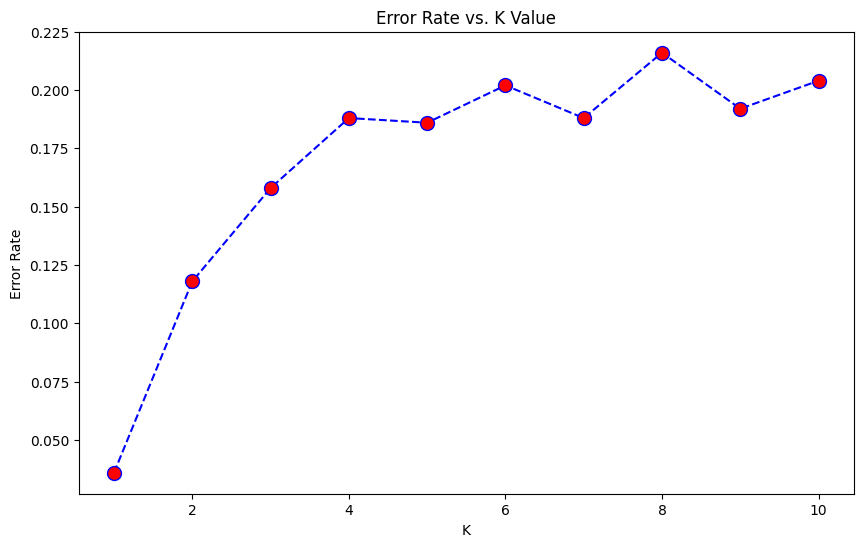

In [20]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [21]:
## This is reference code donot run this on current dataset.
## Error calculation for regression task
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(1,20):

    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.18973665961010275
RMSE value for k=  2 is: 0.25787593916455254
RMSE value for k=  3 is: 0.3141125063837266
RMSE value for k=  4 is: 0.3389321466016465
RMSE value for k=  5 is: 0.3553026878592393
RMSE value for k=  6 is: 0.36377648815355473
RMSE value for k=  7 is: 0.3710437567022994
RMSE value for k=  8 is: 0.36988173785684525
RMSE value for k=  9 is: 0.37218076054320504
RMSE value for k=  10 is: 0.37309516212355265
RMSE value for k=  11 is: 0.3707040431439962
RMSE value for k=  12 is: 0.3684426685388108
RMSE value for k=  13 is: 0.36401768602589213
RMSE value for k=  14 is: 0.3625730046121324
RMSE value for k=  15 is: 0.36149074062215697
RMSE value for k=  16 is: 0.3634792807024907
RMSE value for k=  17 is: 0.3647153698955698
RMSE value for k=  18 is: 0.3653849652619907
RMSE value for k=  19 is: 0.3659087272475204


In [22]:
# let's fit the data into KNN model and see how well it performs:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
# Predict
y_pred = knn1.predict(X_test)

In [24]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.814


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       320
           1       0.77      0.69      0.73       180

    accuracy                           0.81       500
   macro avg       0.80      0.79      0.79       500
weighted avg       0.81      0.81      0.81       500



In [26]:
recall1=recall_score(y_test,y_pred)
recall1

0.6944444444444444

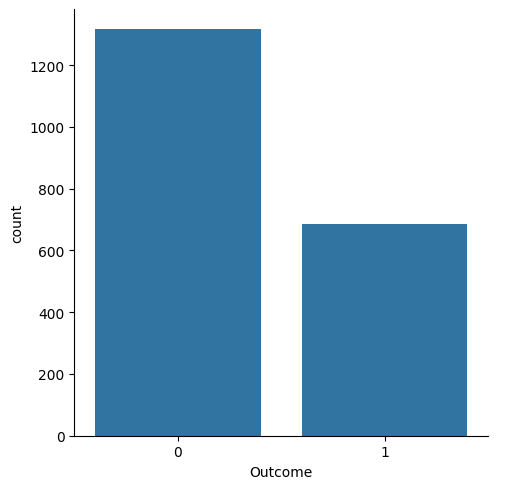

In [27]:
## checking the balance of traget
sns.catplot(x='Outcome',data=data,kind='count') # Imbalanced dataset

In [28]:
data.Outcome.value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [29]:
# Apply SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [30]:
y_train.value_counts()

Outcome
0    996
1    504
Name: count, dtype: int64

In [31]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),
                                                  y_train)

In [32]:
y=np.array(y_train_smote)

In [33]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 996, 1: 504})
SMOTE Classes Counter({0: 996, 1: 996})


In [34]:

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [35]:
# Predict the output for X_test
y_pred = knn2.predict(X_test)

In [36]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.828


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       320
           1       0.71      0.87      0.79       180

    accuracy                           0.83       500
   macro avg       0.82      0.84      0.82       500
weighted avg       0.84      0.83      0.83       500

